In [1]:
#Netowrks
import networkx as nx
import pylab as plt
import seaborn as sns
#%matplotlib notebook
%matplotlib inline
import numpy as np
import matplotlib as mpl

import sys
sys.path.append("../Practicals/")
from common_functions import *

#Change the default options of visualization
custom_params = {"axes.spines.right": False, "axes.spines.top": False, "axes.spines.left": False, "axes.spines.bottom":
False,"lines.linewidth": 2, "grid.color": "lightgray", "legend.frameon": False, "xtick.labelcolor": "#484848", "ytick.labelcolor":
"#484848", "xtick.color": "#484848", "ytick.color": "#484848","text.color": "#484848", "axes.labelcolor": "#484848",
"axes.titlecolor":"#484848","figure.figsize": [5,3],
"axes.titlelocation":"left","xaxis.labellocation":"left","yaxis.labellocation":"bottom"}
palette = ["#3d348b","#e6af2e","#191716","#e0e2db"] #use your favourite colours
sns.set_theme(context='paper', style='white', palette=palette, font='Verdana', font_scale=1.3, color_codes=True,
rc=custom_params)


from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
# Use the following function to plot the CDF of the degree distributions
def plot_cdf(values, scale = "log", ax = None, cum = True, compl = False, marker = 'o-', xlabel = "Degree (d)", ylabel = "p(Degree < d)"):
    from collections import Counter

    # count the number of instance per each degree, sort it
    C = Counter(values)
    deg, cnt = zip(*sorted(C.items()))
    
    # calcualte the cumulative distribution, normalize to be a probability instead of a count
    if cum:
        cs = np.cumsum(cnt)/np.sum(cnt)
    else:
        cs = cnt/np.sum(cnt)
    
    if compl:
        cs = 1 - cs
        
    if ax is None:
        ax = plt.subplot()
    # plot
    ax.plot(deg, cs, marker)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    plt.tight_layout()
    sns.despine(left=True, bottom=True)
    plt.xscale(scale)
    plt.yscale(scale)

# Connectedness

In [3]:
def create_random_netw(average_degree, n = 100, plot = True, type_ = "ER"):
    """
    Input:
        average_degree: average degree in network
        n: number of nodes
        plot: create plot
    Returns:
        size of largest component (%)
        
    """
    if type_ == "ER":
        G = nx.random_graphs.fast_gnp_random_graph(n = n, p = average_degree/((n-1)))
    elif type_ == "BA":
        G = nx.random_graphs.barabasi_albert_graph(n = n, m = int(average_degree+0.9999))
        to_remove = int((n-1)*int(average_degree+0.9999) - (n-1)*average_degree) - 1
        if to_remove > 0:
            edges = list(G.edges())
            G.remove_edges_from(np.random.permutation(edges)[:to_remove])



    lg = max([len(_) for _ in nx.connected_components(G)])/n
    if plot:
        nx.draw(G,  node_size = 30, edge_color = "gray", node_color="#3d348b")
        plt.title(f"Largest component {lg:2.0%}")
    return lg


def create_many_random_net(average_degree, n = 100, plot = False, iters = 10, type_ = "ER"):
    """
    Average several runs of the create_random_netw function
    """
    return np.mean([create_random_netw(average_degree, n=n, plot=plot, type_ = type_) for _ in range(iters)])

0.475

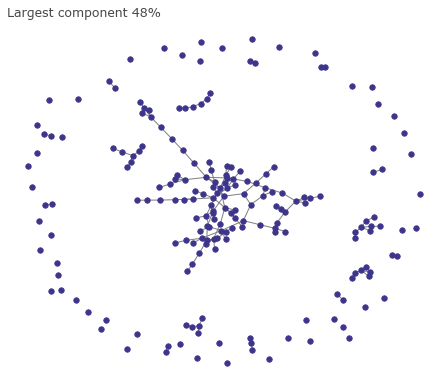

In [4]:
n = 200
average_degree = 1.5

plt.figure(figsize = (6,5))
create_random_netw(average_degree = average_degree, n = n, type_ = "ER")

1.0

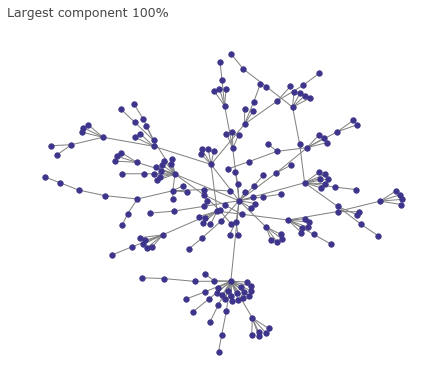

In [5]:
n = 200
average_degree = 1

plt.figure(figsize = (6,5))
create_random_netw(average_degree = average_degree, n = n, type_ = "BA")

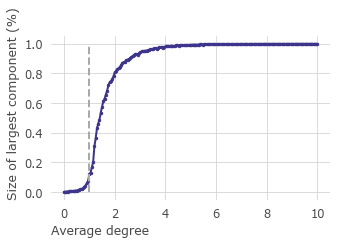

In [6]:
# Run  it many times
n = 1000

test_degrees = np.linspace(0, 10, 200)
results = [create_many_random_net(ad, n = n, iters = 10) for ad in test_degrees]
plt.plot(test_degrees, results, ".-")
plt.plot([1,1],[0,1], "--", color="darkgray")
plt.ylabel("Size of largest component (%)")
plt.xlabel("Average degree")
plt.grid(True)

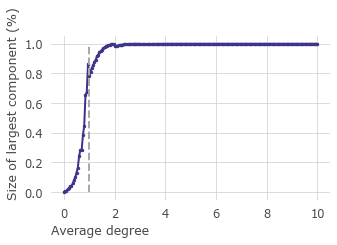

In [7]:
# Run  it many times
n = 1000

test_degrees = np.linspace(0.001, 10, 200)
results = [create_many_random_net(ad, n = n, iters = 10, type_ = "BA") for ad in test_degrees]
plt.plot(test_degrees, results, ".-")
plt.plot([1,1],[0,1], "--", color="darkgray")
plt.ylabel("Size of largest component (%)")
plt.xlabel("Average degree")
plt.grid(True)

# Small world networks

23.950922922922924


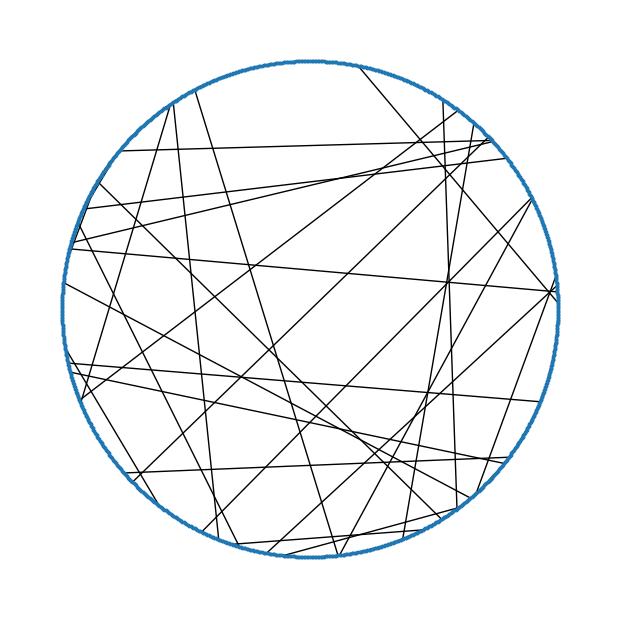

In [40]:
G = nx.random_graphs.connected_watts_strogatz_graph(1000, 4, p=0.01)
pos = nx.circular_layout(G)
plt.figure(figsize=(6,6))
nx.draw(G, pos = pos, node_size = 4)
print(nx.average_shortest_path_length(G))

# Heavy tail distributions

In [4]:
def plot_network_s(G, ax):
    values = nx.degree_centrality(G).values()
    import matplotlib as mpl
    norm = mpl.colors.Normalize(vmin=min(values), vmax=max(values), clip=True)
    mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)



    nx.draw(G, pos = nx.spring_layout(G, seed = 1), node_size=500*np.array(list(values)), edge_color = "lightgray", 
          node_color = [mapper.to_rgba(i) for i in values], ax = ax)



0.10020202020202021


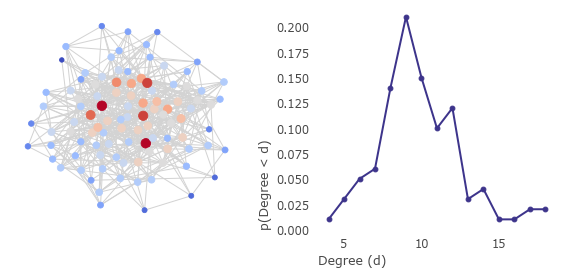

In [10]:
G = nx.random_graphs.erdos_renyi_graph(100, 10/100)
print(nx.density(G))
plt.figure(figsize=(8,4))
ax = plt.subplot(121)
plot_network_s(G, ax)

ax = plt.subplot(122)
plot_cdf([v for k,v in G.degree()], scale="linear", cum=False, ax = ax)

0.09595959595959595


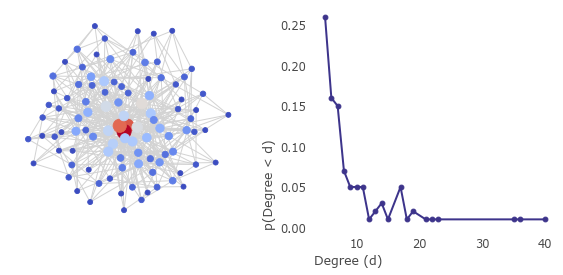

In [11]:
G = nx.random_graphs.barabasi_albert_graph(100,5)
print(nx.density(G))
plt.figure(figsize=(8,4))
ax = plt.subplot(121)
plot_network_s(G, ax)

ax = plt.subplot(122)
plot_cdf([v for k,v in G.degree()], scale="linear", cum=False, ax = ax)

# Centralities slides

In [12]:
G = nx.florentine_families_graph()
pos = nx.spring_layout(G, seed = 1)

G_dir = nx.DiGraph()
G_dir.add_edges_from(G.edges())



Text(0.0, 1.0, 'Directed')

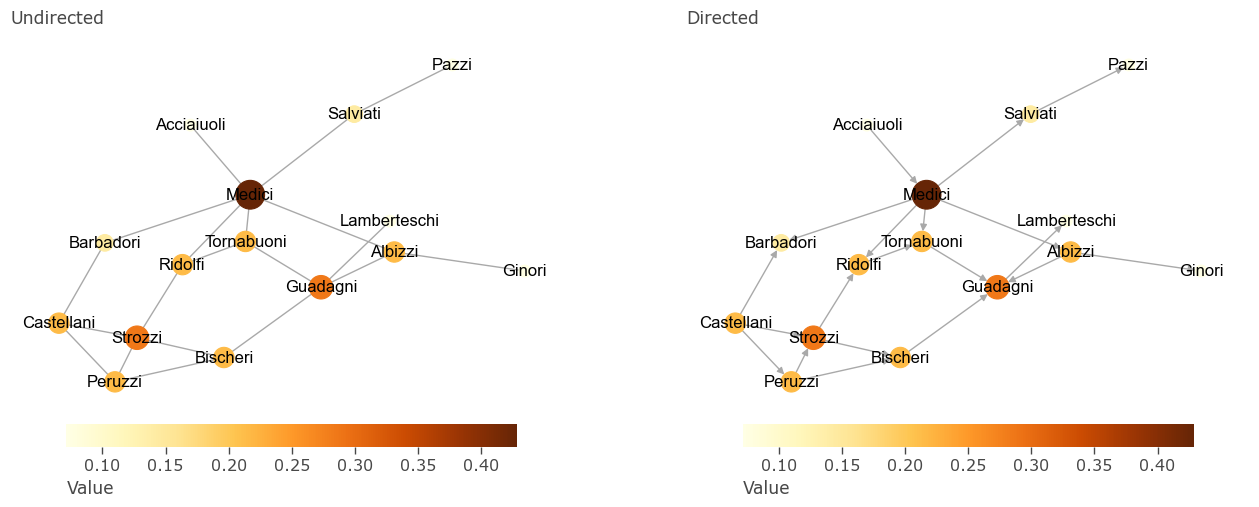

In [13]:
# Degree centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.degree_centrality(G) 
cent = np.array([cent[i] for i in G])
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.degree_centrality(G_dir) 
cent = np.array([cent[i] for i in G_dir])
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

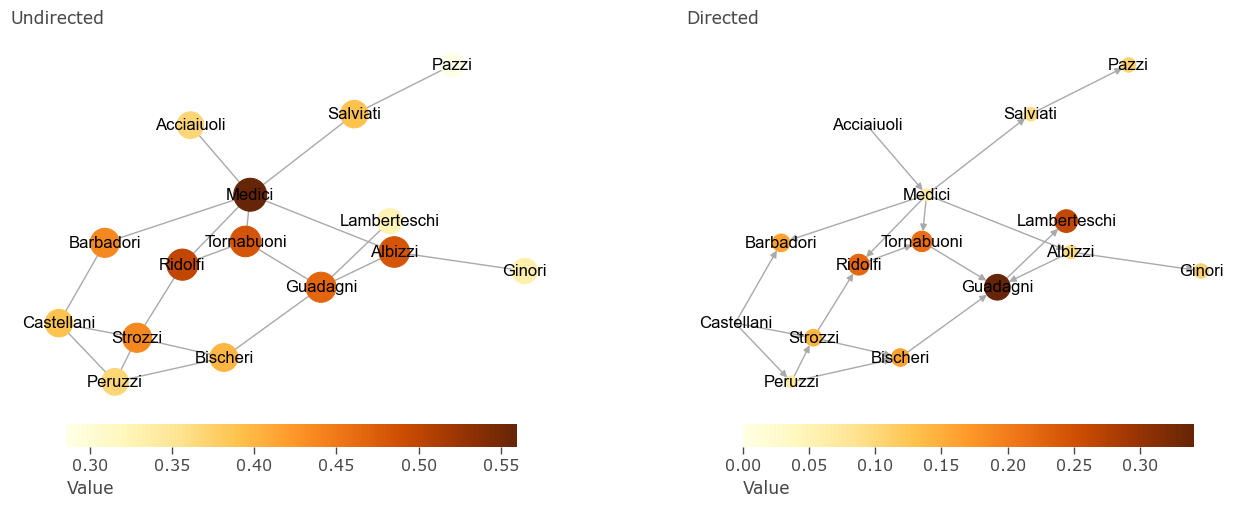

In [33]:
# closeness centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.closeness_centrality(G) 
cent = np.array([cent[i] for i in G])
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.closeness_centrality(G_dir) 
cent = np.array([cent[i] for i in G_dir])
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

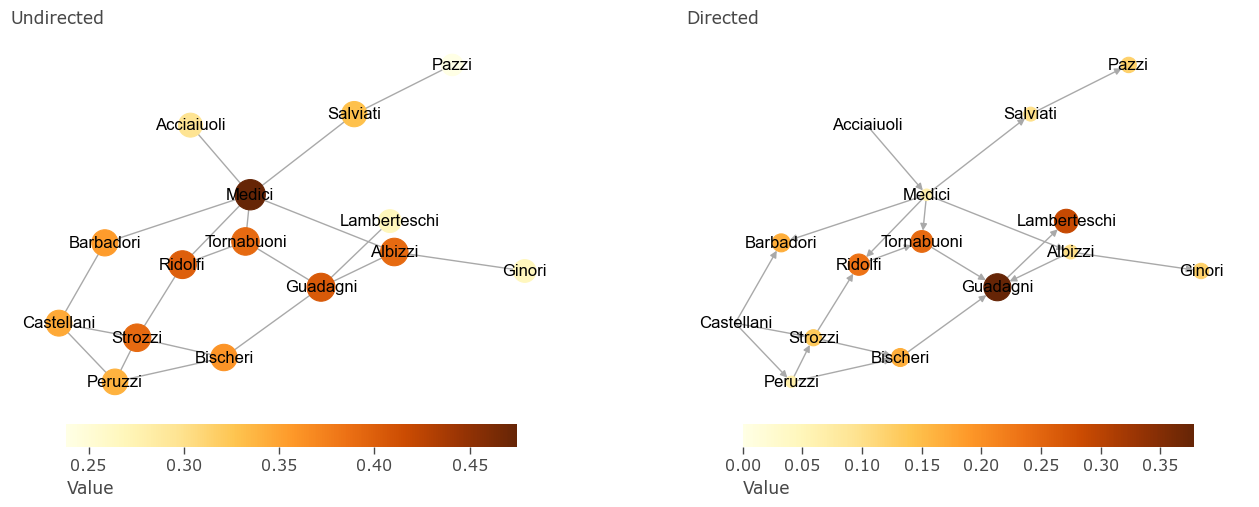

In [32]:
# harm closeness centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.harmonic_centrality(G) 
cent = np.array([cent[i] for i in G])/20
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.harmonic_centrality(G_dir) 
cent = np.array([cent[i] for i in G_dir])/15
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

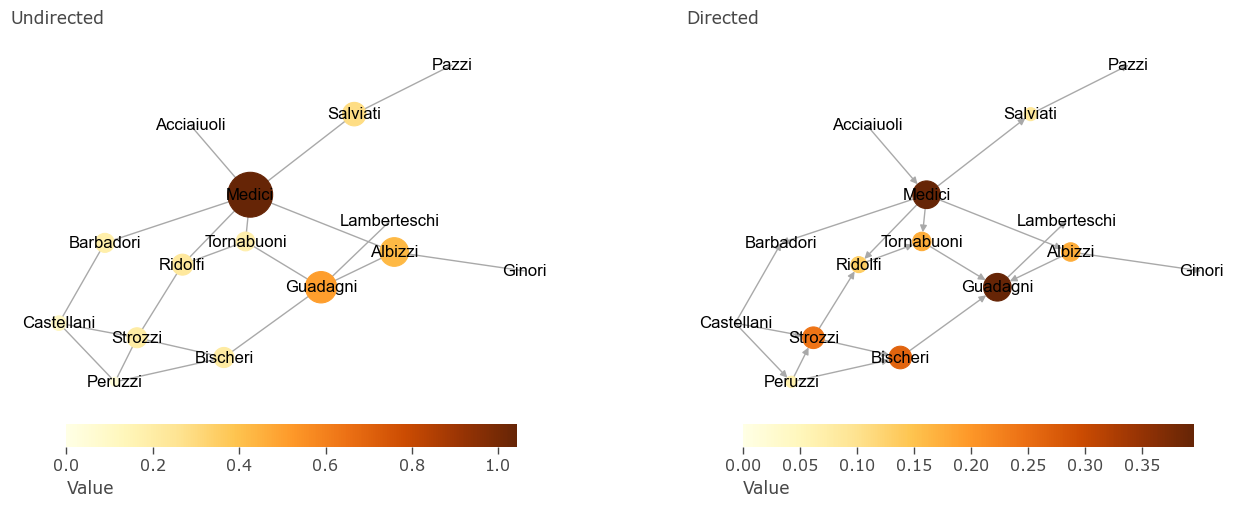

In [31]:
# betwe centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.betweenness_centrality(G) 
cent = np.array([cent[i] for i in G])*2
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.betweenness_centrality(G_dir) 
cent = np.array([cent[i] for i in G_dir])*8
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

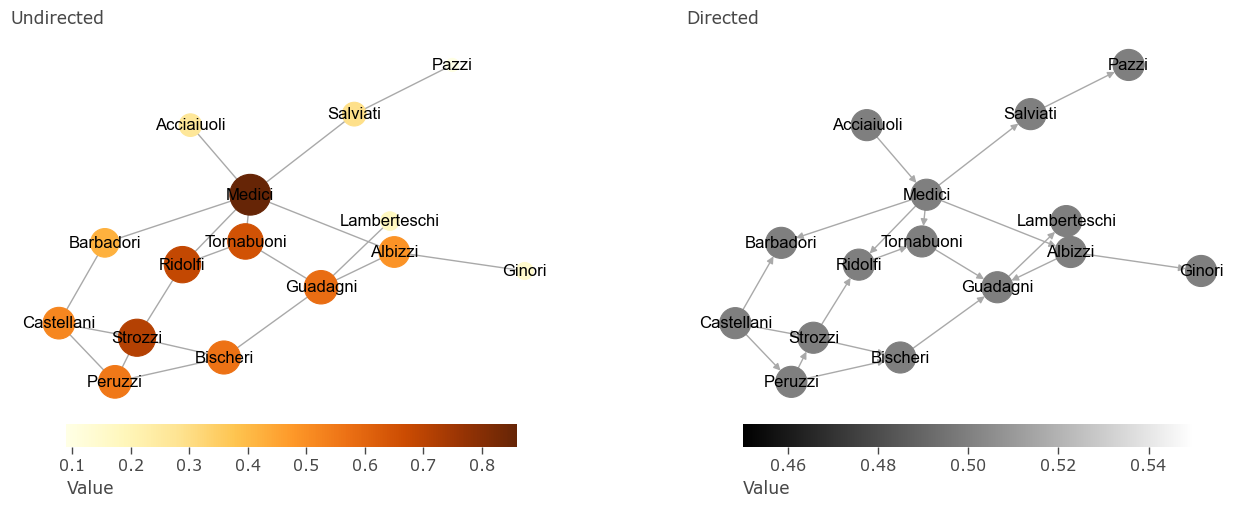

In [17]:
# eigen centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.eigenvector_centrality(G) 
cent = np.array([cent[i] for i in G])*2
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = [0.5]*len(G)
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.gray, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

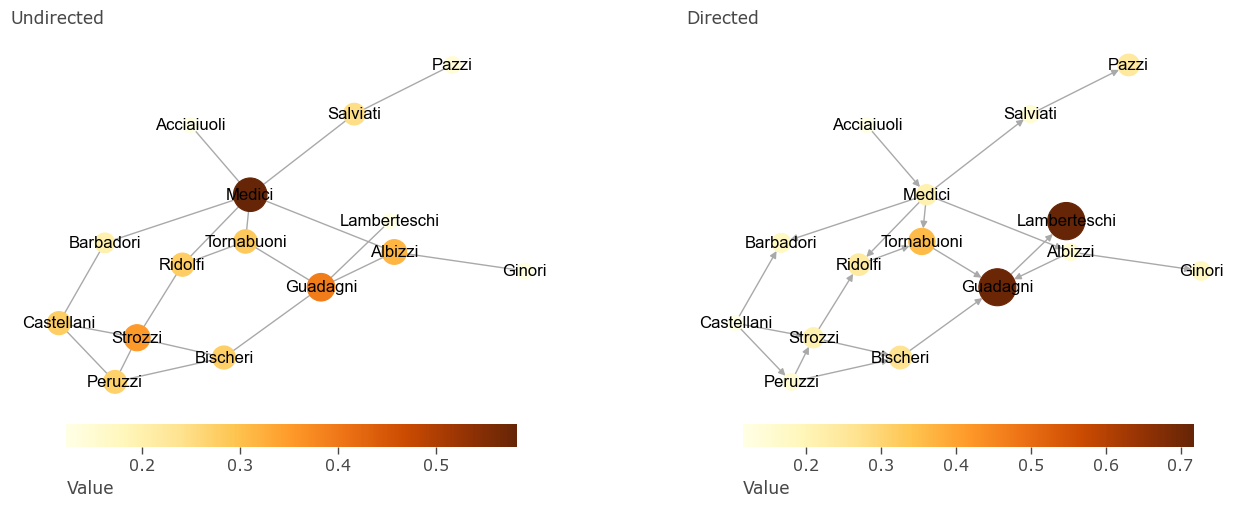

In [18]:
# pr centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.pagerank(G) 
cent = np.array([cent[i] for i in G])*4
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.pagerank(G_dir) 
cent = np.array([cent[i] for i in G_dir])*4
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

Text(0.0, 1.0, 'Directed')

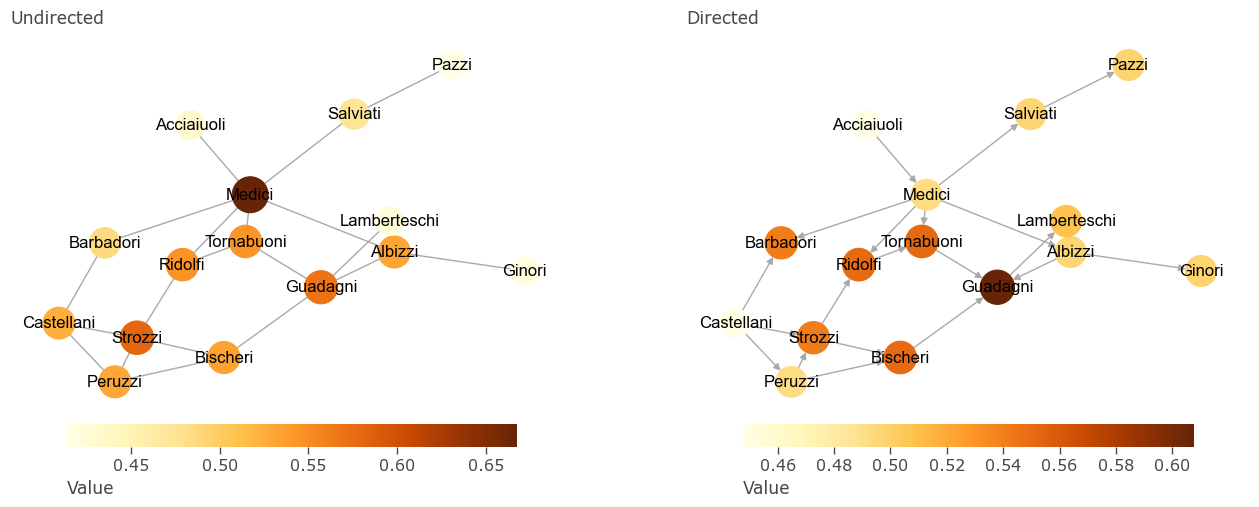

In [29]:
# pr centrality
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))
cent = nx.katz_centrality(G) 
cent = np.array([cent[i] for i in G])*2
plot_network(G, a0 = a0, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)

cent = nx.katz_centrality(G_dir) 
cent = np.array([cent[i] for i in G_dir])*2
plot_network(G_dir, a0 = a1, values = cent, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Undirected")
a1.set_title("Directed")

/Users/garci061/miniforge3/envs/networks/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)
/Users/garci061/miniforge3/envs/networks/lib/python3.10/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/garci061/miniforge3/envs/networks/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:728: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(marker_size) / 2


Text(0.0, 1.0, 'Authorities')

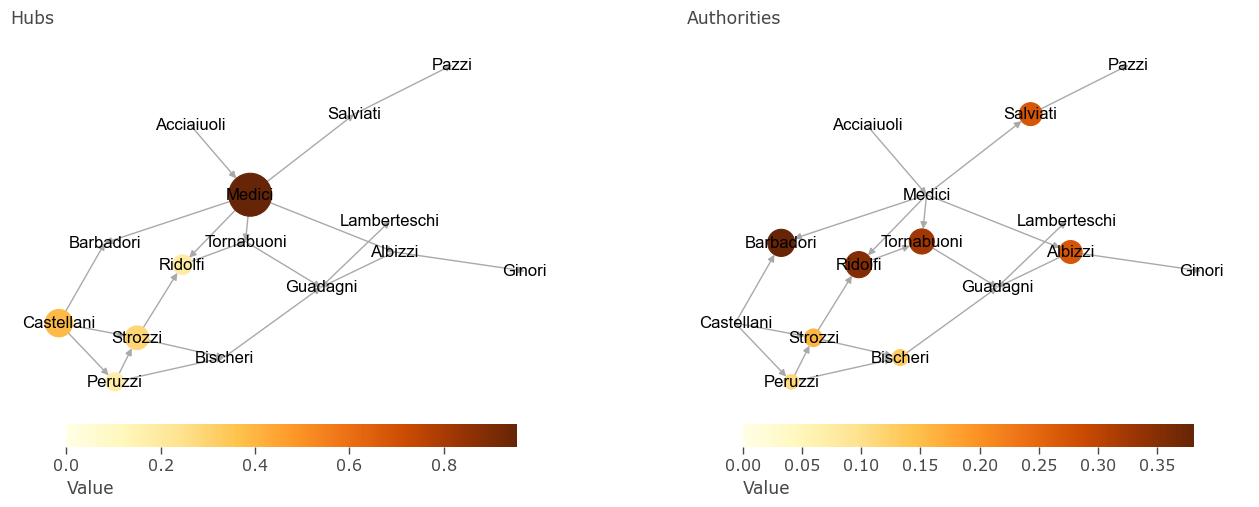

In [21]:
# hits
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(16,6))


h,a = nx.hits(G_dir) 
centh = np.array([h[i] for i in G_dir])*2
centa = np.array([a[i] for i in G_dir])*2
plot_network(G_dir, a0 = a0, values = centh, cmap=mpl.cm.YlOrBr, pos = pos)
a0.set_title("Hubs")
plot_network(G_dir, a0 = a1, values = centa, cmap=mpl.cm.YlOrBr, pos = pos)
a1.set_title("Authorities")

# Day 3

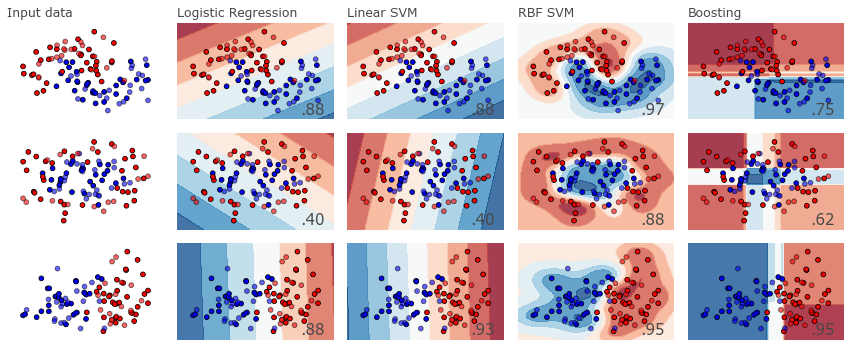

In [22]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Logistic Regression",
    "Linear SVM",
    "RBF SVM",
    "Boosting",
]

classifiers = [
    LogisticRegression(C=0.025),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    HistGradientBoostingClassifier(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(12, 5))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()